In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby

In [54]:
df = pd.read_csv('../data/blogtext_t100.csv')
print('Number of blogsposts:',len(df))
df.head()

Number of blogsposts: 112598


,id,gender,age,topic,sign,date,text
0,589736,male,35,Technology,Aries,"05,August,2004",Much funny. 2 points. As mentioned in the...
1,589736,male,35,Technology,Aries,"05,August,2004","Harpers, Harpers, everywhere. Harpers, Har..."
2,589736,male,35,Technology,Aries,"05,August,2004","In an earlier post, Johnathan said: 'And ..."
3,589736,male,35,Technology,Aries,"05,August,2004","I'd post this on the RTG Blog, but I can't..."
4,589736,male,35,Technology,Aries,"05,August,2004",The answer to the first question lies with ...


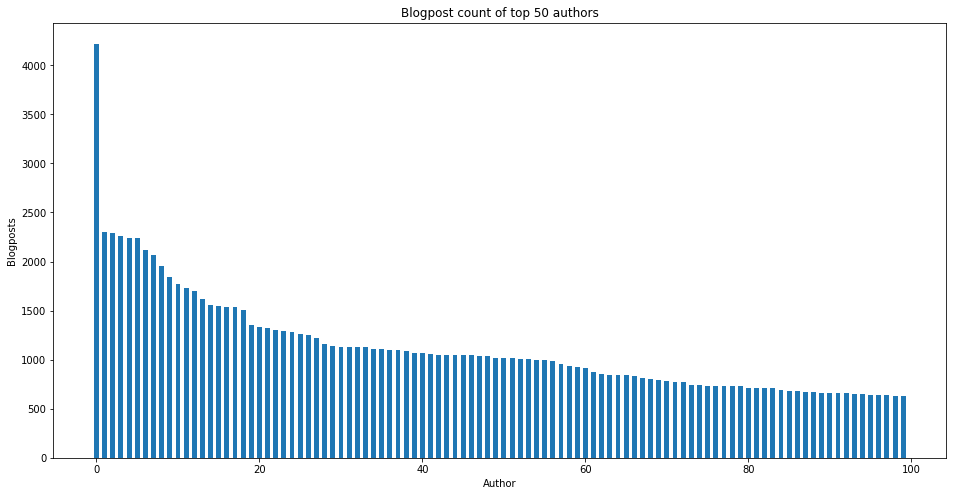

In [55]:
authors = df['id'].values
auth_freqs = sorted([(a, len(list(f))) for a,f in groupby(sorted(authors))],key=lambda tup:tup[1],reverse=True)
plt.figure(figsize=(16,8))
plt.bar(np.arange(len(auth_freqs)),[t[1] for t in auth_freqs],width=0.6)
plt.xlabel('Author')
plt.ylabel('Blogposts')
plt.title('Blogpost count of top 50 authors')
plt.show()

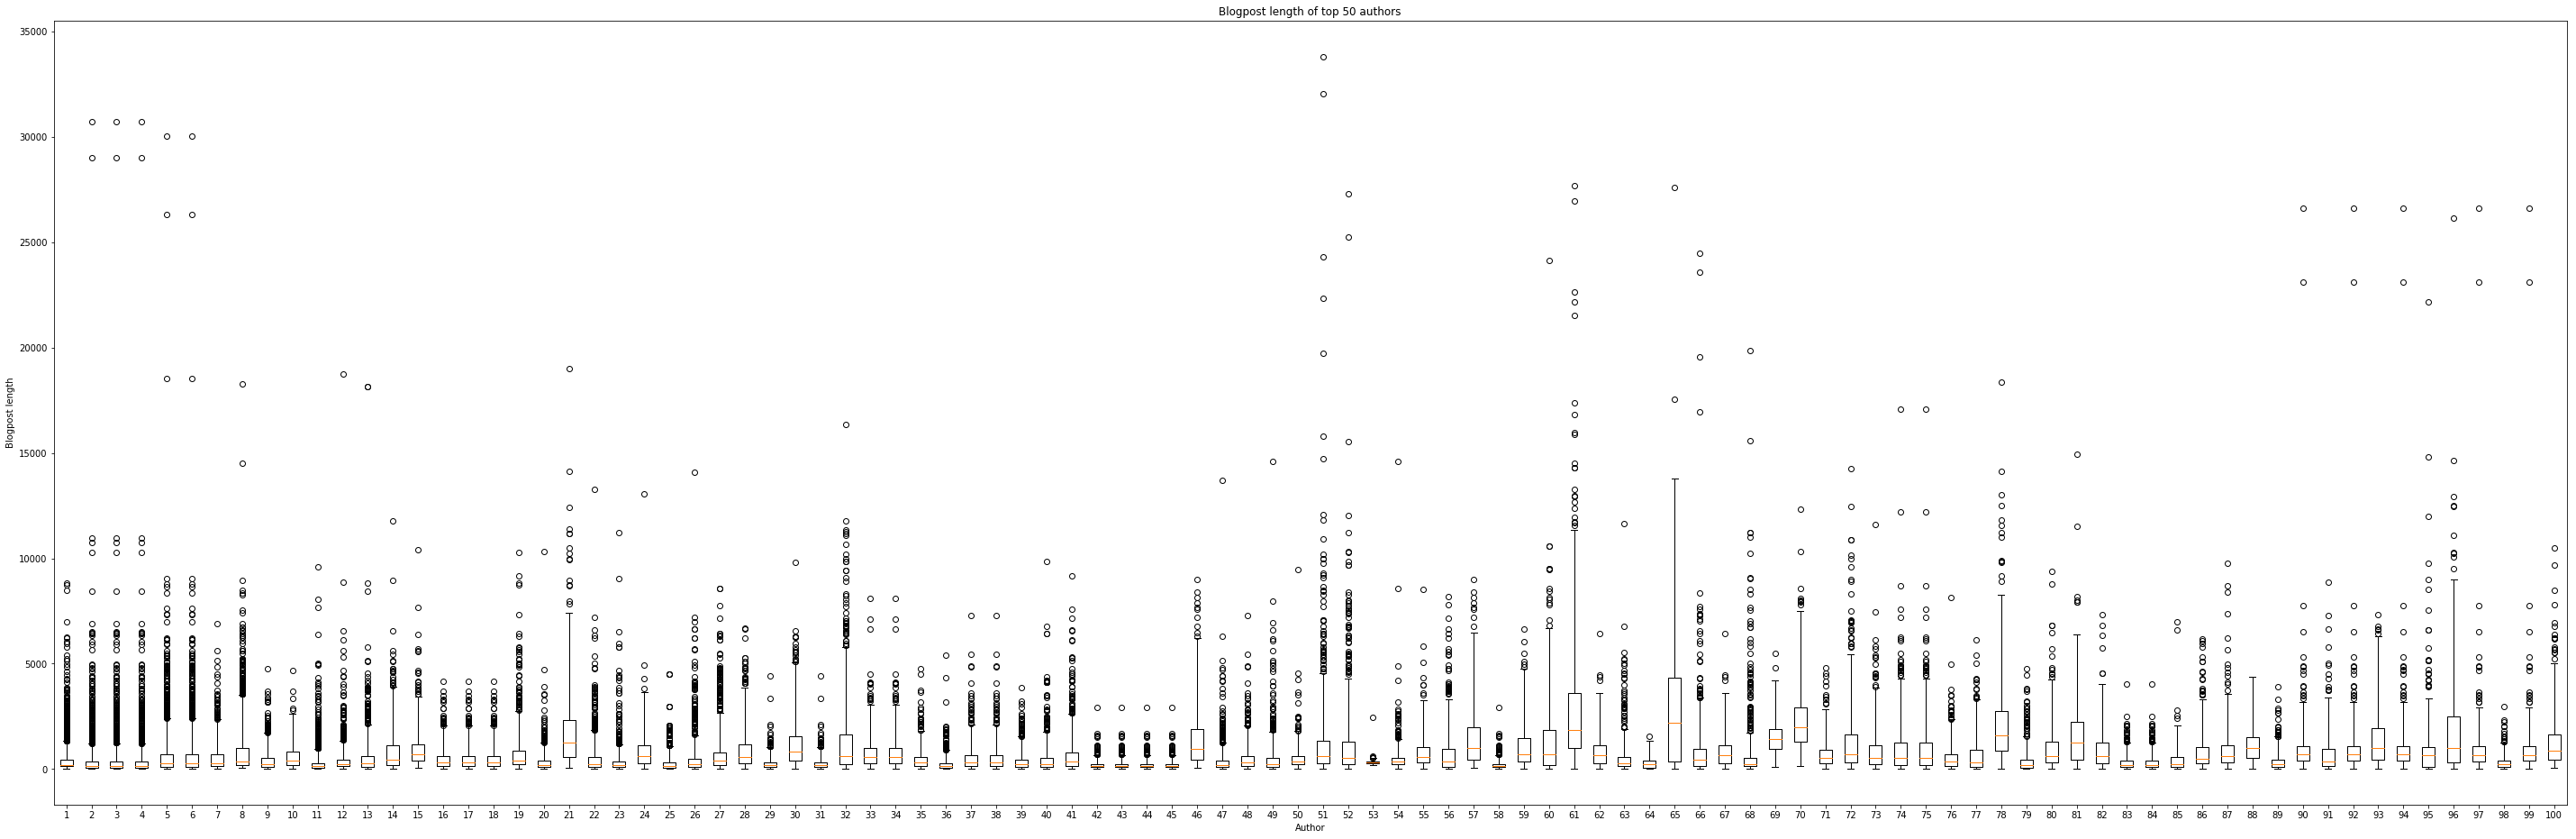

In [56]:
df = df[df['text'].map(len) < 40000]
unique_auth = [t[0] for t in auth_freqs]
text_lengths = []
for a in unique_auth:
    text_lengths.append([len(text) for text in df[df['id'] == a]['text'].values])
plt.figure(figsize=(50,16))
plt.xlabel('Author')
plt.ylabel('Blogpost length')
plt.title('Blogpost length of top 100 authors')
plt.boxplot(text_lengths,whis=3)
plt.show()

In [60]:
# Manually dropping because of seemingly duplicate bloggers
# Drop
# 3, 4
# 6
# 17, 18
# 31
# 34
# 38
# 43, 44, 45
# 75
# 84
# 92
# 94
# 99
fishy = np.array([3, 4, 6, 17, 18, 31, 34, 38, 43, 44, 45, 75, 84, 92, 94, 99])-1
filt_auth = [x for x in unique_auth]
for f in fishy:
    filt_auth[f] = -1
filt_auth = [x for x in filt_auth if x != -1]
df_filt = df[df['id'].map(lambda i: i in filt_auth)]

100
84


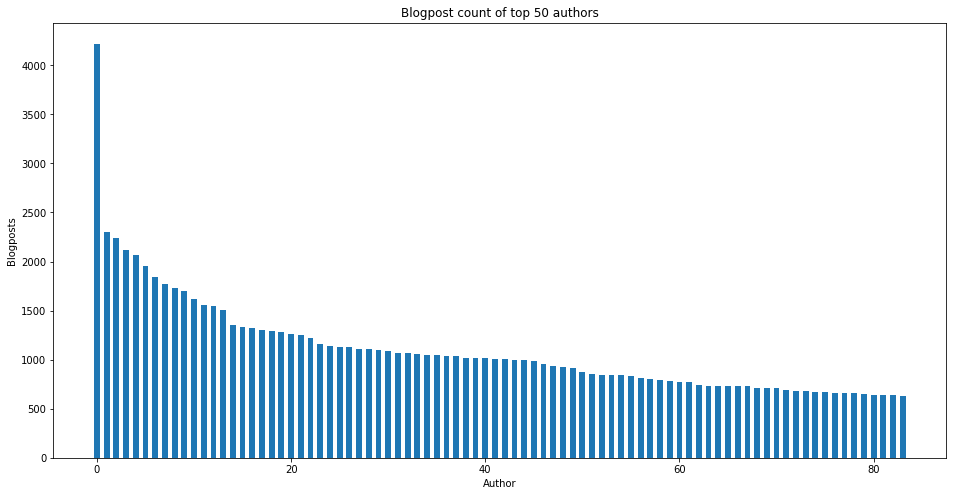

In [61]:
authors = df_filt['id'].values
auth_freqs = sorted([(a, len(list(f))) for a,f in groupby(sorted(authors))],key=lambda tup:tup[1],reverse=True)
plt.figure(figsize=(16,8))
plt.bar(np.arange(len(auth_freqs)),[t[1] for t in auth_freqs],width=0.6)
plt.xlabel('Author')
plt.ylabel('Blogposts')
plt.title('Blogpost count of top 50 authors')
plt.show()

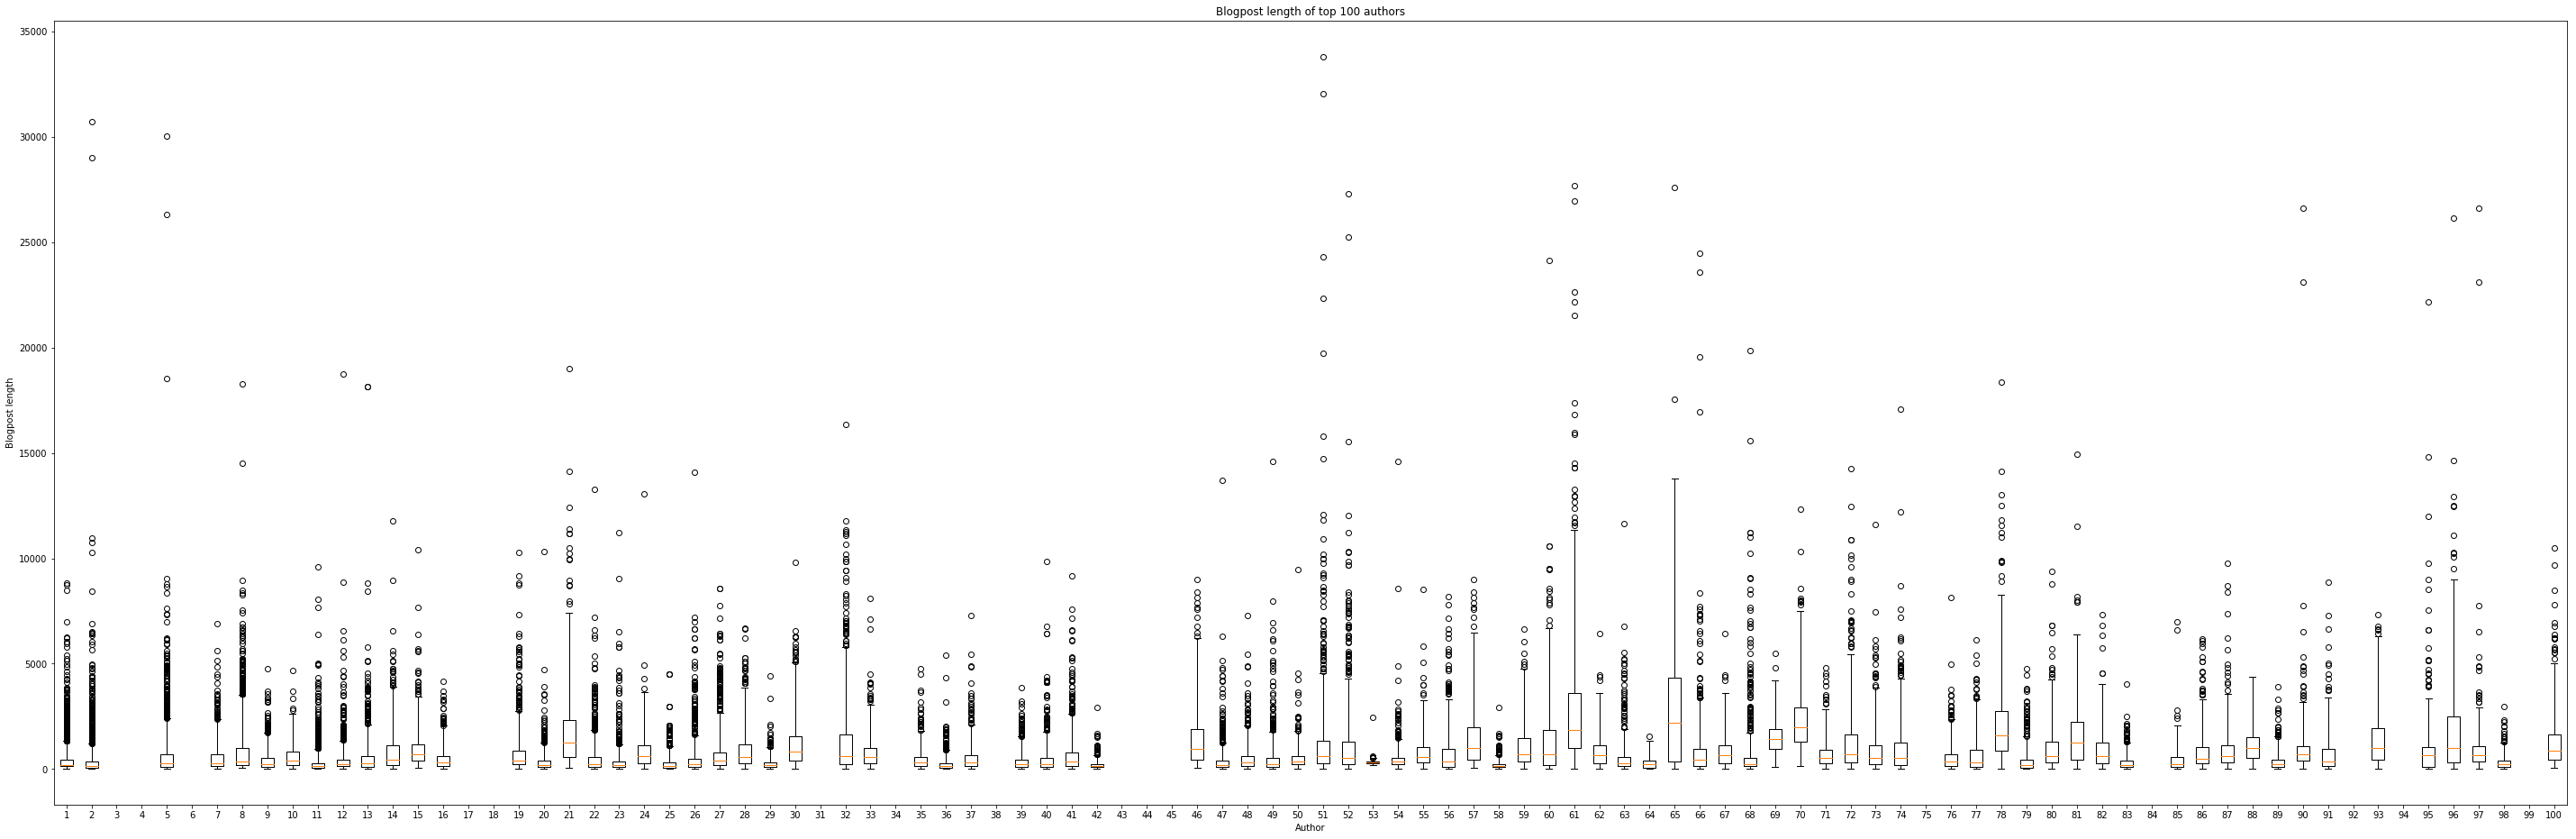

In [62]:
text_lengths = []
for a in unique_auth:
    text_lengths.append([len(text) for text in df_filt[df_filt['id'] == a]['text'].values])
plt.figure(figsize=(50,16))
plt.xlabel('Author')
plt.ylabel('Blogpost length')
plt.title('Blogpost length of top 100 authors')
plt.boxplot(text_lengths,whis=3)
plt.show()

In [63]:
print(len(df_filt))

92837


In [64]:
df_filt.to_csv('../data/blogtext_t100_filt.csv')